In [2]:
import tensorflow as tf
import os
import csv
import numpy as np

In [3]:
#Directory
train_csv = "C:\Clarenti\Data\Project\ML\Program\Dataset\Sign/sign_mnist_train.csv"
test_csv = "C:\Clarenti\Data\Project\ML\Program\Dataset\Sign/sign_mnist_test.csv"

In [4]:
x_train = []
y_train = []

with open(train_csv) as f:
    csvfile =  csv.reader(f, delimiter=",")
 
    next(csvfile, None)

    for row in csvfile:
        label = row[0]
        data = row[1:] # >>> 784 features
        dataarr = np.array(data).reshape((28, 28))

        x_train.append(dataarr)
        y_train.append(label)

# convert the value of x_train and y_train to float type
x_train = np.array(x_train).astype(float)
y_train = np.array(y_train).astype(float)

In [5]:
x_train.shape

(27455, 28, 28)

In [6]:
x_test = []
y_test = []
with open(test_csv) as f:
    csvfile = csv.reader(f, delimiter=",")
    next(csvfile, None)
    for row in csvfile :
        label = row[0]
        data = row[1:]
        dataarr = np.array(data).reshape((28, 28))

        x_test.append(dataarr)
        y_test.append(label)

x_test = np.array(x_test).astype(float)
y_test = np.array(y_test).astype(float)

In [7]:
x_test.shape

(7172, 28, 28)

In [8]:
# Here i'm gonna wrap up the train and test that contains many features into 1

x_train = np.expand_dims(x_train, axis=3) #>>> (27455, 28, 28) -> (27455, 28, 28, 1)
x_test = np.expand_dims(x_test, axis=3) 

In [9]:
print(x_train.shape)
print(y_train.shape)

(27455, 28, 28, 1)
(27455,)


In [10]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255., rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True, 
    fill_mode='nearest',
    validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1/255.)

In [11]:
from sklearn.model_selection import train_test_split

# to make sure the proportion of classes is the same in both training and validation subsets by using stratified split
x, x_val, y, y_val = train_test_split(x_train, y_train, test_size=0.2, stratify=y_train)
x_train = np.concatenate((x, x_val))
y_train = np.concatenate((y, y_val))

In [12]:
train_generator = train_datagen.flow(
    x_train,
    y_train,
    batch_size=32,
    subset='training'
)

validation_generator = train_datagen.flow(
    x_val,
    y_val,
    batch_size=32,
    subset='validation'
)

test_generator = test_datagen.flow(
    x_test,
    y_test,
    batch_size=32,
)

In [13]:
model = tf.keras.models.Sequential(layers=[
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    # tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 128)         0

In [14]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [15]:
hist = model.fit(train_generator, validation_data=validation_generator, epochs=25, verbose=1)

Epoch 1/25
687/687 [==============================] - 59s 85ms/step - loss: 2.8695 - accuracy: 0.1321 - val_loss: 2.3716 - val_accuracy: 0.2732
Epoch 2/25
687/687 [==============================] - 59s 85ms/step - loss: 2.0721 - accuracy: 0.3414 - val_loss: 1.7418 - val_accuracy: 0.4472
Epoch 3/25
687/687 [==============================] - 62s 90ms/step - loss: 1.6338 - accuracy: 0.4686 - val_loss: 1.3327 - val_accuracy: 0.5683
Epoch 4/25
687/687 [==============================] - 65s 95ms/step - loss: 1.3717 - accuracy: 0.5502 - val_loss: 1.1942 - val_accuracy: 0.6175
Epoch 5/25
687/687 [==============================] - 50s 73ms/step - loss: 1.1992 - accuracy: 0.6013 - val_loss: 1.0229 - val_accuracy: 0.6530
Epoch 6/25
687/687 [==============================] - 50s 73ms/step - loss: 1.0649 - accuracy: 0.6435 - val_loss: 0.8832 - val_accuracy: 0.6867
Epoch 7/25
687/687 [==============================] - 50s 73ms/step - loss: 0.9741 - accuracy: 0.6731 - val_loss: 0.7913 - val_accuracy:

In [23]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

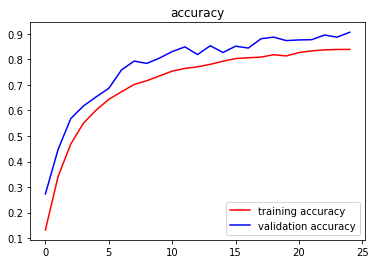

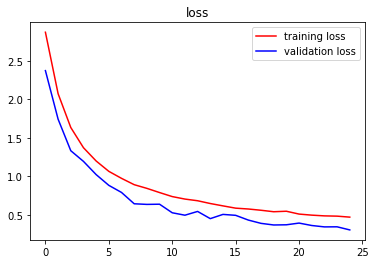

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(acc, 'r', label='training accuracy')
plt.plot(val_acc, 'b', label='validation accuracy')
plt.title('accuracy')
plt.legend()
plt.figure()

plt.plot(loss, 'r', label='training loss')
plt.plot(val_loss, 'b', label='validation loss')
plt.title('loss')
plt.legend()
# plt.figure()

In [18]:
# evaluate
model.evaluate(test_generator)

225/225 [==============================] - 5s 21ms/step - loss: 0.1553 - accuracy: 0.9444


[0.15528327226638794, 0.944366991519928]